In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

(500, 2)


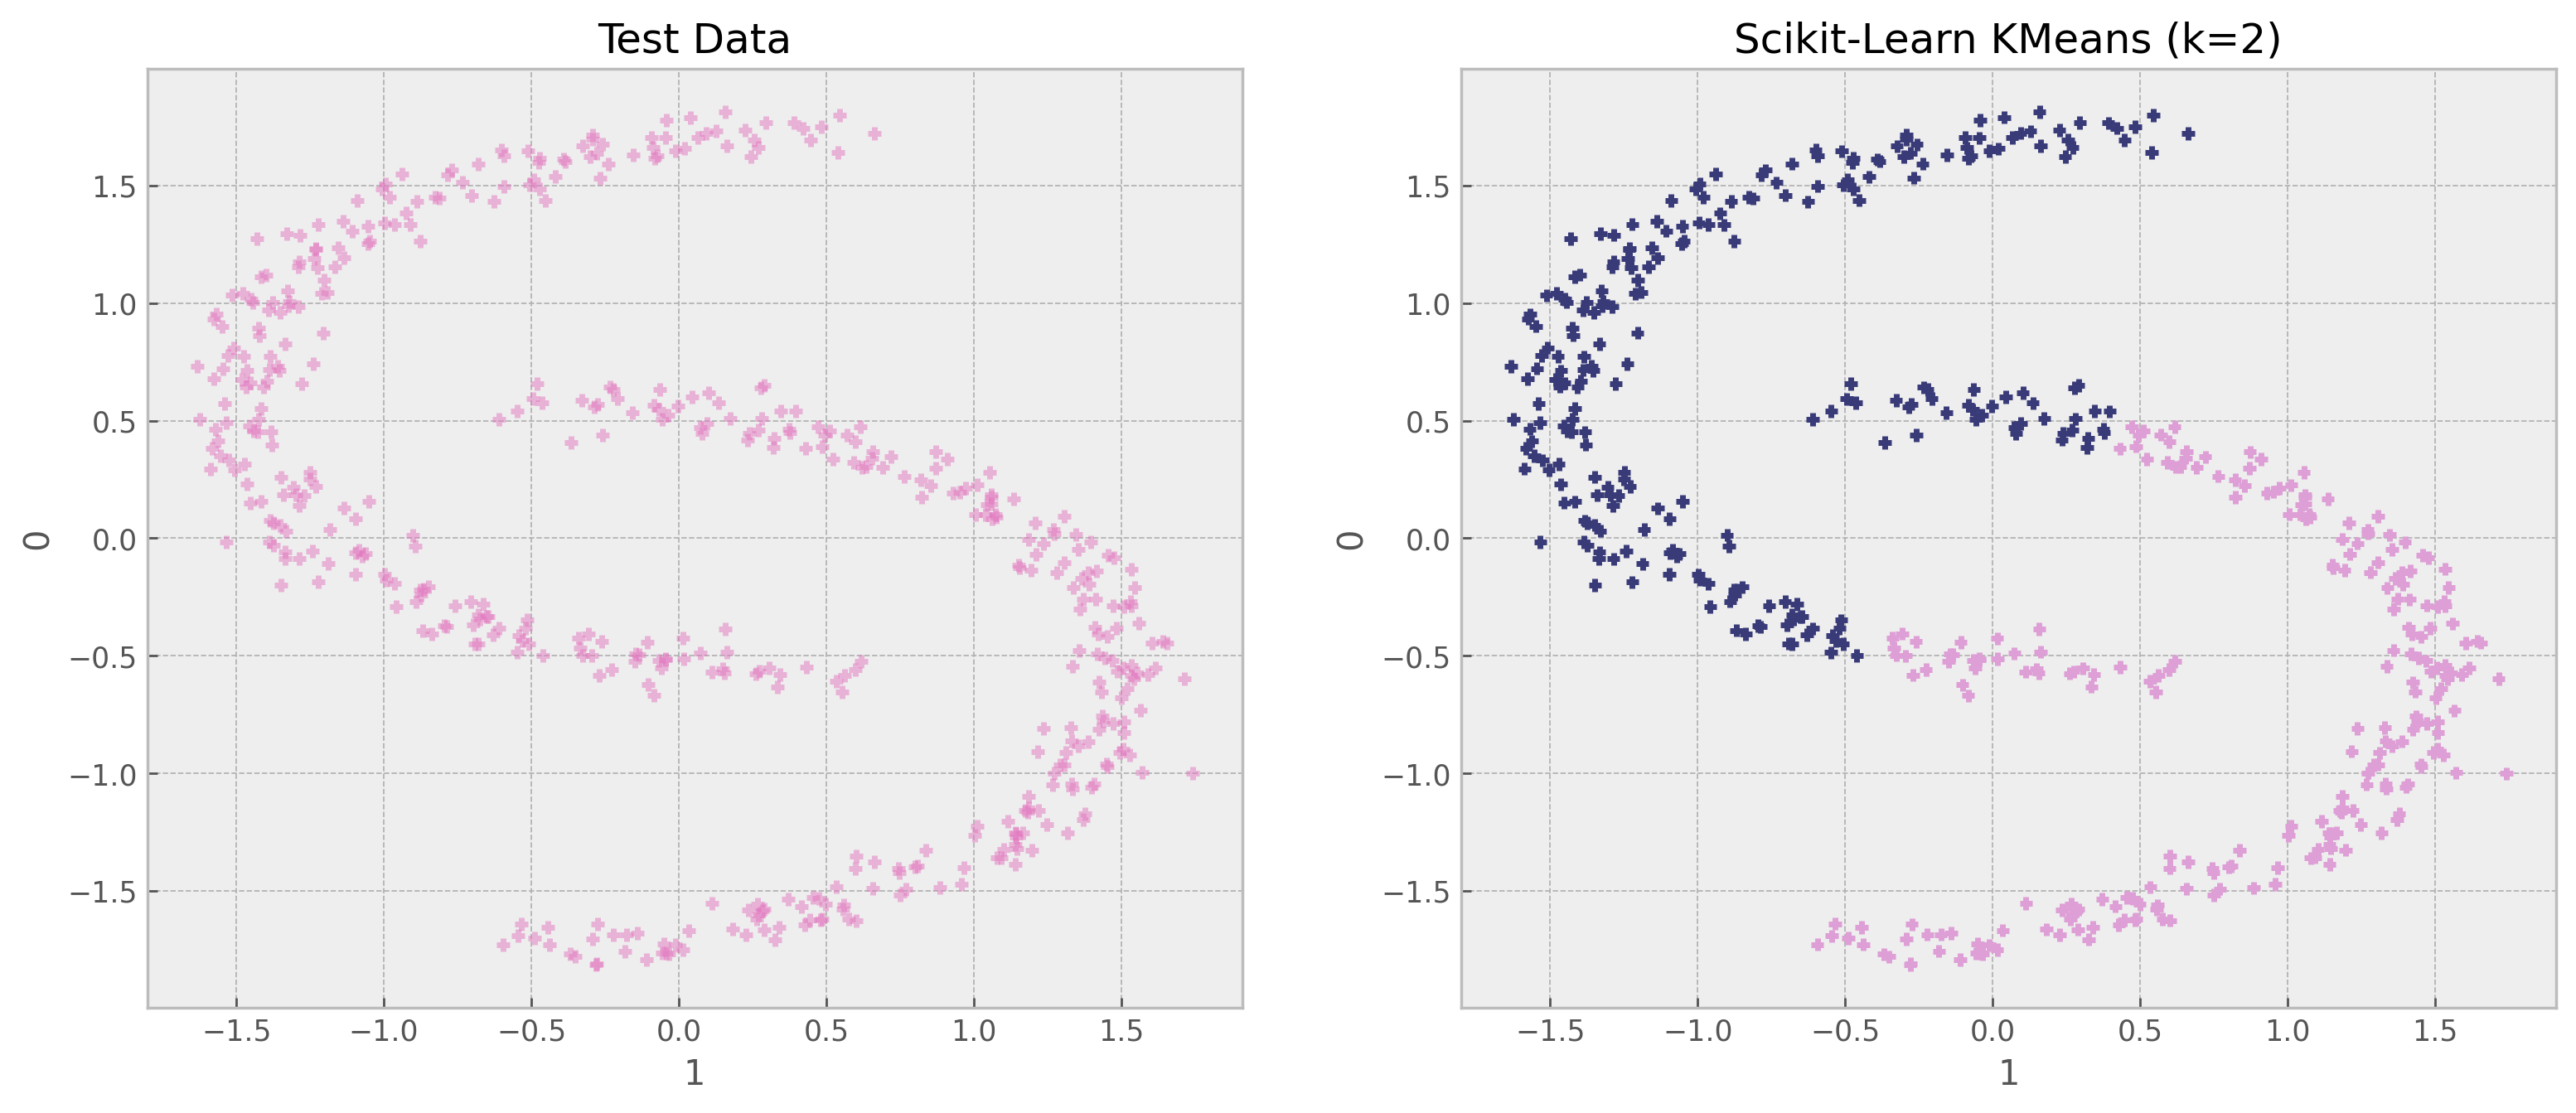

In [2]:
# Create Blobs
blobs = make_moons(500, noise=0.055)[0]
print(blobs.shape)
# Standardized the data
for x in range(2):
    m = blobs[:,x].mean()
    s = blobs[:,x].std()
    for y in range(len(blobs)):
        blobs[y,x] = (blobs[y,x] - m)/s

#Plot
plt.style.use("bmh")
fig, ax = plt.subplots(1,2, dpi=250)

# Scikit-Learn KMeans
preds_k = KMeans(2).fit(blobs).labels_
kmean_blob = np.append(blobs, preds_k.reshape(-1,1), axis=1)
pd.DataFrame(kmean_blob).plot(x=1, y=0, kind="scatter",ax=ax[1], c=2, colorbar=False, title= "Scikit-Learn KMeans (k=2)", marker="+", colormap="tab20b")

# Test Data
pd.DataFrame(blobs).plot(x=1, y=0, kind="scatter", ax=ax[0], alpha=0.5, figsize=(15,6), title="Test Data", marker="+", c="#e377c0")


In [3]:
model = DBSCAN(eps=0.2, min_samples=5).fit(blobs)
print(model)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)


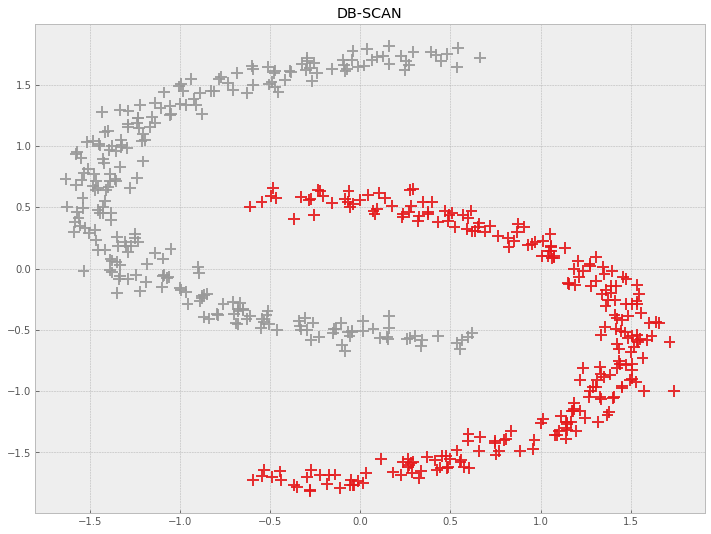

In [4]:
fig, ax = plt.subplots(figsize=(12, 9))
ax.scatter(blobs[:, 1], blobs[:, 0], c=model.labels_, s=140, alpha=0.9,
                 cmap=plt.cm.Set1, marker="+")

plt.title("DB-SCAN")
fig.show()